# EDA With Pandas

### Source of Missing Values
- User forgot to fill in field
- Data was lost while transferring manually from a legacy database
- There was a programming error
- User chose not to fill out a field to their beliefs about how the results would be used or interpreted

In [200]:
import numpy as np
import pandas as pd

In [201]:
url = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv'
df = pd.read_csv(url)

In [202]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 636.0+ bytes


### Standard Missing Values


In [204]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [205]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [206]:
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

### Non-Standard Missing Values

In [207]:
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [208]:
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [209]:
missing_values =["n/a", "na", "--"]

In [210]:
df = pd.read_csv(url, na_values=missing_values)

In [211]:
df["NUM_BEDROOMS"]

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

### Unexpected Missing Values

In [212]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [213]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

Terdapat angka 12 yang mana seharusnya Y/N, Cara mengganti angka 12 di indeks ke-3

In [214]:
for row in df["OWN_OCCUPIED"]:
    if row not in ["Y", "N", np.nan]:
        index_loc = df["OWN_OCCUPIED"].to_list().index(row)
        print("ganti", row, "di index", index_loc)
        df.iloc[index_loc, 3] = np.nan

ganti 12 di index 3


In [215]:
df["OWN_OCCUPIED"].unique()

array(['Y', 'N', nan], dtype=object)

In [216]:
for i in df["OWN_OCCUPIED"].unique():
    if i not in ["Y", "N", np.nan]:
        df["OWN_OCCUPIED"].replace(i, np.nan, inplace=True)

In [217]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        print("ganti", row, "di index", cnt)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

### Summarizing Missing Values

In [218]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [219]:
df.isnull().values.any()

True

In [220]:
df.isnull().sum().sum()

12

### Replacing

In [221]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [222]:
df['ST_NUM'].fillna(125, inplace=True)

In [223]:
df["ST_NUM"]

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [224]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [225]:
#Improvisasi
df.loc[4,["PID"]] = df["PID"].median()

cara umum mengganti missing values dengan median

In [226]:
median = df["NUM_BEDROOMS"].median()
df["NUM_BEDROOMS"].fillna(median, inplace=True)

## Analyzing Obesity in England

In [227]:
%matplotlib inline

In [228]:
data = pd.ExcelFile('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/obes.xls')

In [229]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [230]:
data_age = data.parse(u"7.2", skiprows=4, skipfooter=14)
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


## Time Series

In [231]:
data_age.rename(columns={"Unnamed: 0" : 'Year'}, inplace=True)

In [232]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [233]:
data_age.dropna(inplace=True)

In [234]:
data_age.set_index('Year', inplace=True)

<Axes: xlabel='Year'>

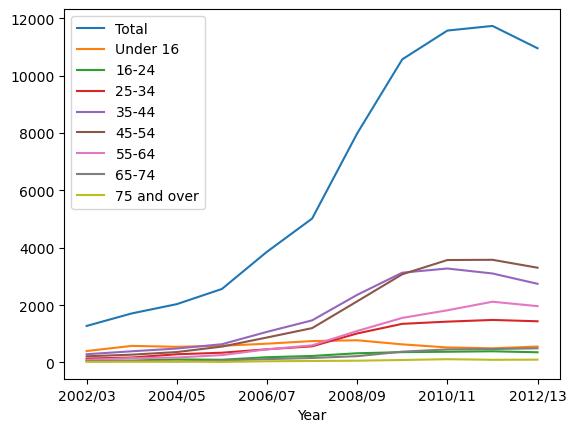

In [235]:
data_age.plot()

In [236]:
data_age_no_total = data_age.drop(['Total'],axis=1)

<Axes: xlabel='Year'>

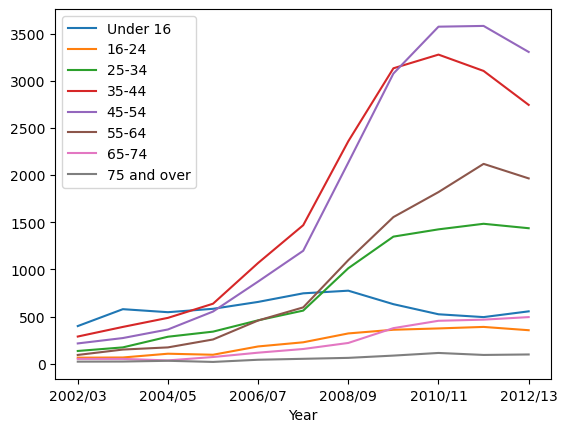

In [237]:
data_age_no_total.plot()

PLOT : Under 16 & 35-44

<Axes: xlabel='Year'>

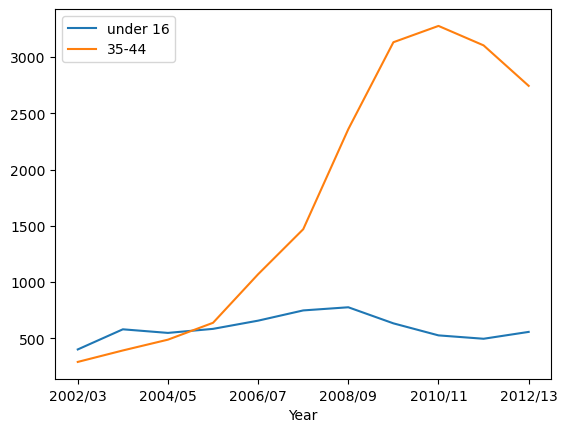

In [238]:
data_age["Under 16"].plot(label="under 16", legend=True)
data_age["35-44"].plot(label="35-44", legend=True)

## Time Series

### Basic Manipulation

In [239]:
from datetime import datetime

In [240]:
date_rng = pd.date_range(start="2020-01-01", end="2020-08-01", freq="H")
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-07-31 15:00:00', '2020-07-31 16:00:00',
               '2020-07-31 17:00:00', '2020-07-31 18:00:00',
               '2020-07-31 19:00:00', '2020-07-31 20:00:00',
               '2020-07-31 21:00:00', '2020-07-31 22:00:00',
               '2020-07-31 23:00:00', '2020-08-01 00:00:00'],
              dtype='datetime64[ns]', length=5113, freq='H')

In [241]:
df = pd.DataFrame(date_rng, columns=["date"])
df.head()

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00


In [242]:
df["data"] = np.random.randint(0,100, len(df))
df.head()

,date,data
0,2020-01-01 00:00:00,16
1,2020-01-01 01:00:00,58
2,2020-01-01 02:00:00,78
3,2020-01-01 03:00:00,47
4,2020-01-01 04:00:00,46


In [243]:
df.set_index("date", inplace=True)

In [244]:
df.head()

,data
date,
2020-01-01 00:00:00,16
2020-01-01 01:00:00,58
2020-01-01 02:00:00,78
2020-01-01 03:00:00,47
2020-01-01 04:00:00,46


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5113 entries, 2020-01-01 00:00:00 to 2020-08-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   data    5113 non-null   int64
dtypes: int64(1)
memory usage: 79.9 KB


In [246]:
str(date_rng[0])

'2020-01-01 00:00:00'

In [247]:
string_date_rng = [str(x) for x in date_rng]

In [248]:
string_date_rng[:5]

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00']

String to datetime

In [249]:
timestamp_date_rng = pd.to_datetime(string_date_rng, format="%Y-%m-%d %H:%M:%S")
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-07-31 15:00:00', '2020-07-31 16:00:00',
               '2020-07-31 17:00:00', '2020-07-31 18:00:00',
               '2020-07-31 19:00:00', '2020-07-31 20:00:00',
               '2020-07-31 21:00:00', '2020-07-31 22:00:00',
               '2020-07-31 23:00:00', '2020-08-01 00:00:00'],
              dtype='datetime64[ns]', length=5113, freq=None)

In [250]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']
pd.to_datetime(string_date_rng_2)

DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03'], dtype='datetime64[ns]', freq=None)

In [251]:

string_date_rng_3 = ['01/06/70', '02/06/70', '03/06/70']
ts_date_rng_3 = pd.to_datetime(string_date_rng_3, format="%d/%m/%y")

In [252]:
df2 = pd.DataFrame(ts_date_rng_3,columns=["date"])
df2

,date
0,1970-06-01
1,1970-06-02
2,1970-06-03


Look index by day

In [253]:
df[df.index.day == 2]

,data
date,
2020-01-02 00:00:00,67
2020-01-02 01:00:00,73
2020-01-02 02:00:00,36
2020-01-02 03:00:00,29
2020-01-02 04:00:00,57
...,...
2020-07-02 19:00:00,35
2020-07-02 20:00:00,73
2020-07-02 21:00:00,3


look into spesific date index

In [254]:
df[:'2020-08-01':24]

,data
date,
2020-01-01,16
2020-01-02,67
2020-01-03,71
2020-01-04,45
2020-01-05,97
...,...
2020-07-28,26
2020-07-29,13
2020-07-30,36


Melakukan operasi mean, sum, dll pada frekuensi harian

In [255]:
df.resample("D").median()

,data
date,
2020-01-01,46.5
2020-01-02,47.5
2020-01-03,55.5
2020-01-04,45.0
2020-01-05,62.0
...,...
2020-07-28,47.5
2020-07-29,41.5
2020-07-30,64.0


Window statistics seperti rolling mean/ rolling sum

In [256]:
df["rolling_sum"] = df.rolling(3).sum()

In [257]:
df.head(9)

,data,rolling_sum
date,,
2020-01-01 00:00:00,16,NaN
2020-01-01 01:00:00,58,NaN
2020-01-01 02:00:00,78,152.0
2020-01-01 03:00:00,47,183.0
2020-01-01 04:00:00,46,171.0
2020-01-01 05:00:00,55,148.0
2020-01-01 06:00:00,54,155.0
2020-01-01 07:00:00,36,145.0
2020-01-01 08:00:00,16,106.0


Backward Rolling Sum

In [258]:
df["rolling_sum"].bfill(inplace=True)

In [259]:
df.head()

,data,rolling_sum
date,,
2020-01-01 00:00:00,16,152.0
2020-01-01 01:00:00,58,152.0
2020-01-01 02:00:00,78,152.0
2020-01-01 03:00:00,47,183.0
2020-01-01 04:00:00,46,171.0


### Time Series Dataset

In [260]:
url_ts = 'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv'
opsd_daily = pd.read_csv(url_ts)
opsd_daily.shape

(4383, 5)

In [261]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [262]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Menampilkan fitur kolom

In [263]:
opsd_daily.nunique()

Date           4383
Consumption    4374
Wind           2913
Solar          2185
Wind+Solar     2185
dtype: int64

In [264]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [265]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


Using `index_col` and `parse_dates ` to set index from date when we read the file

In [267]:
opsd_daily = pd.read_csv(
    'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', 
    index_col=0, parse_dates=True
    )

In [268]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [269]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [270]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [271]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [272]:
opsd_daily.loc['2014-01-20': '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


plot area

<Axes: xlabel='Date'>

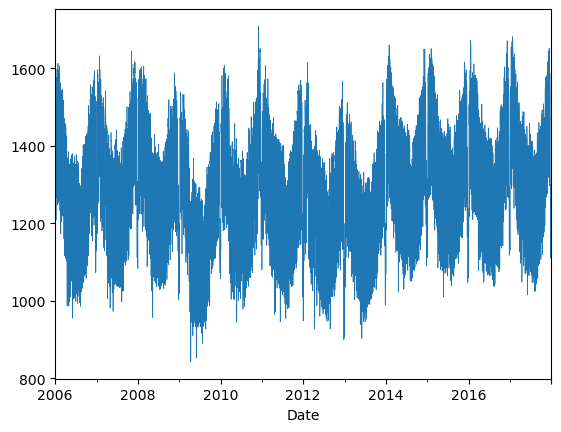

In [274]:
opsd_daily['Consumption'].plot(linewidth=0.5)

dot plot from consumption feature

<Axes: xlabel='Date'>

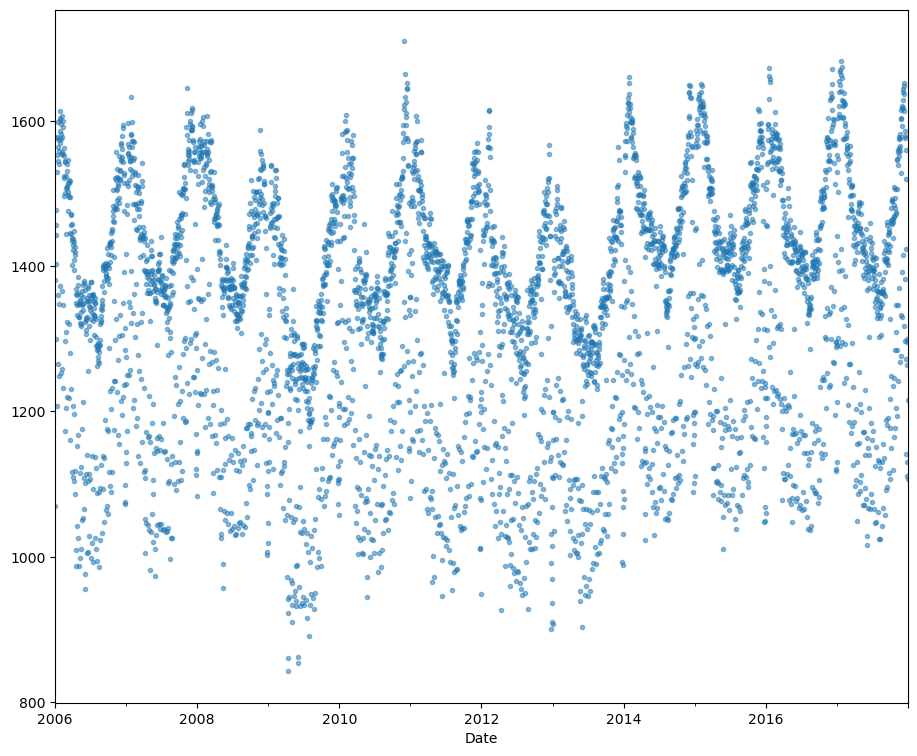

In [280]:
opsd_daily['Consumption'].plot(marker='.',alpha=0.5,  linestyle='None',  figsize=(11, 9))

dot plot from solar feature

<Axes: xlabel='Date'>

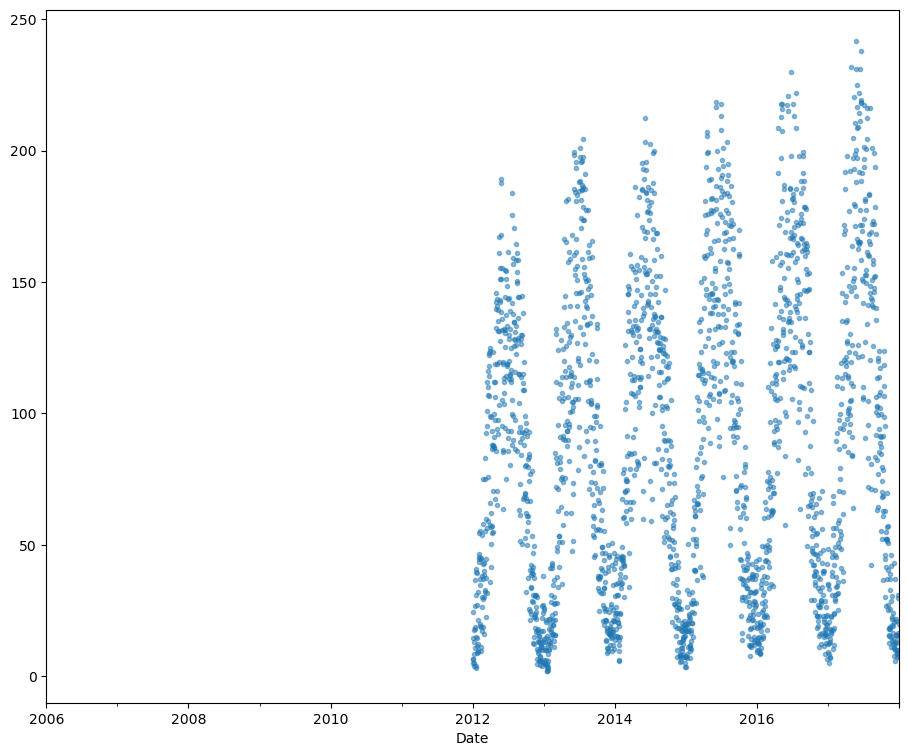

In [282]:
opsd_daily['Solar'].plot(marker='.',alpha=0.5,  linestyle='None',  figsize=(11, 9))

<Axes: xlabel='Date'>

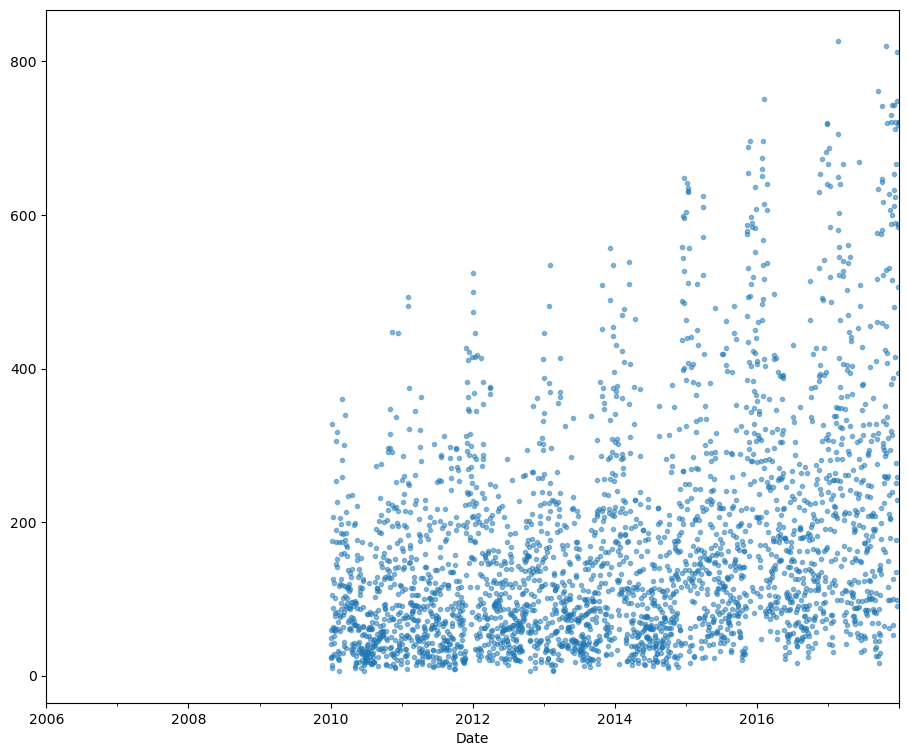

In [283]:
opsd_daily['Wind'].plot(marker='.',alpha=0.5,  linestyle='None',  figsize=(11, 9))

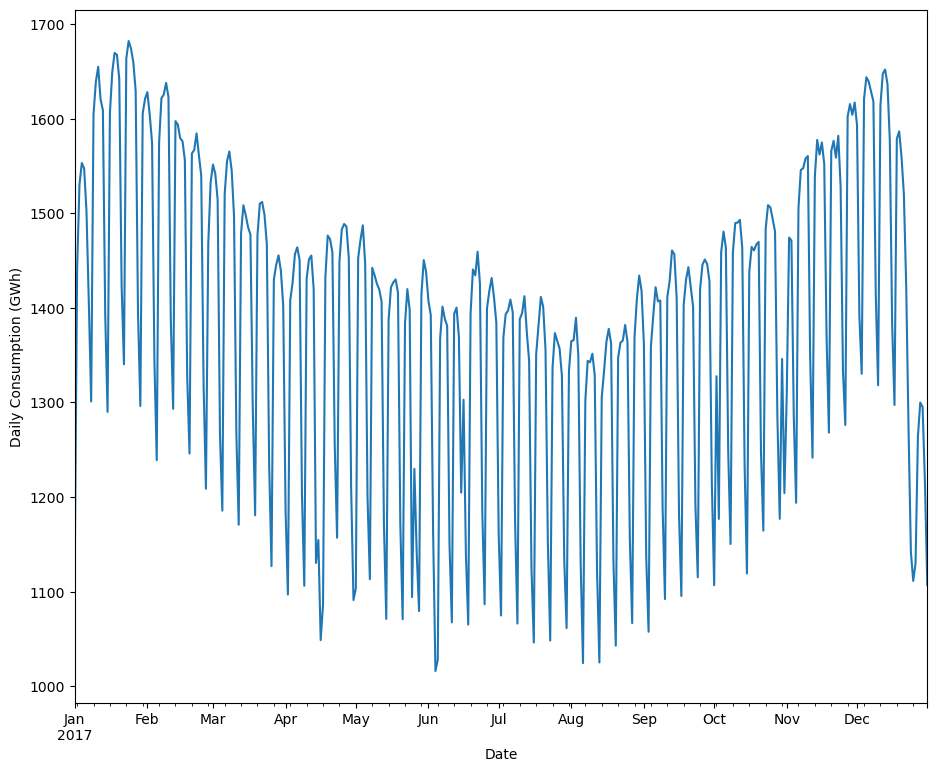

In [284]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

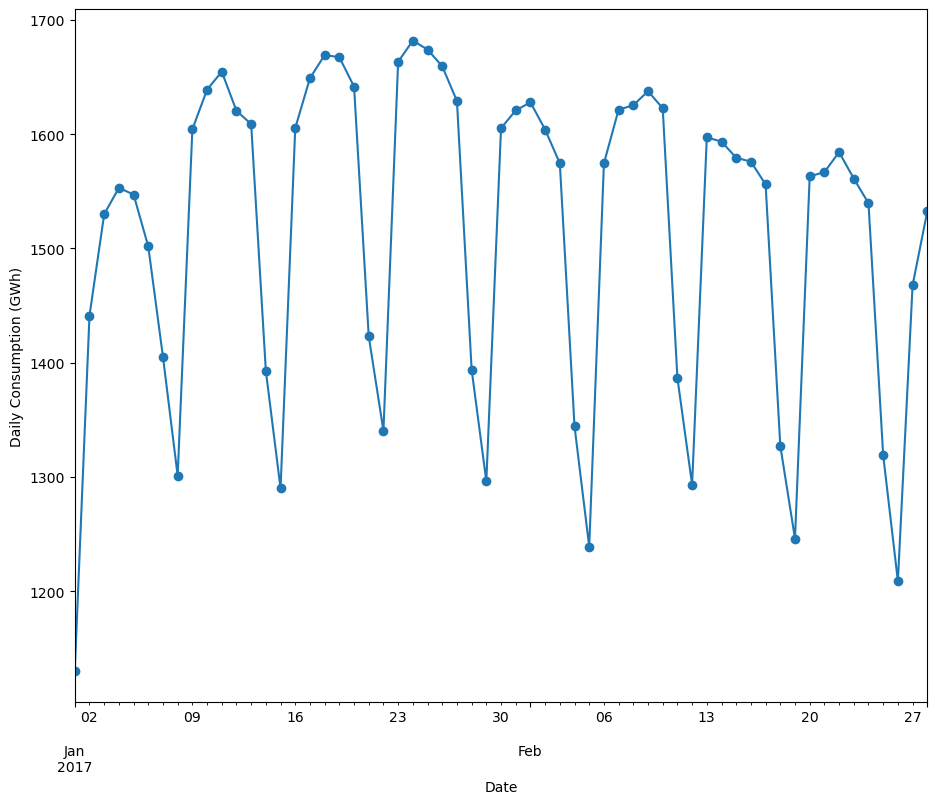

In [291]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(linestyle='-',marker='o',figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

`Boxplot` : mengelompokkan data berdasarkan periode waktu yang berbeda dan menampilkan distribusi untuk setiap kelompok

<Axes: title={'center': 'Consumption'}, xlabel='Month'>

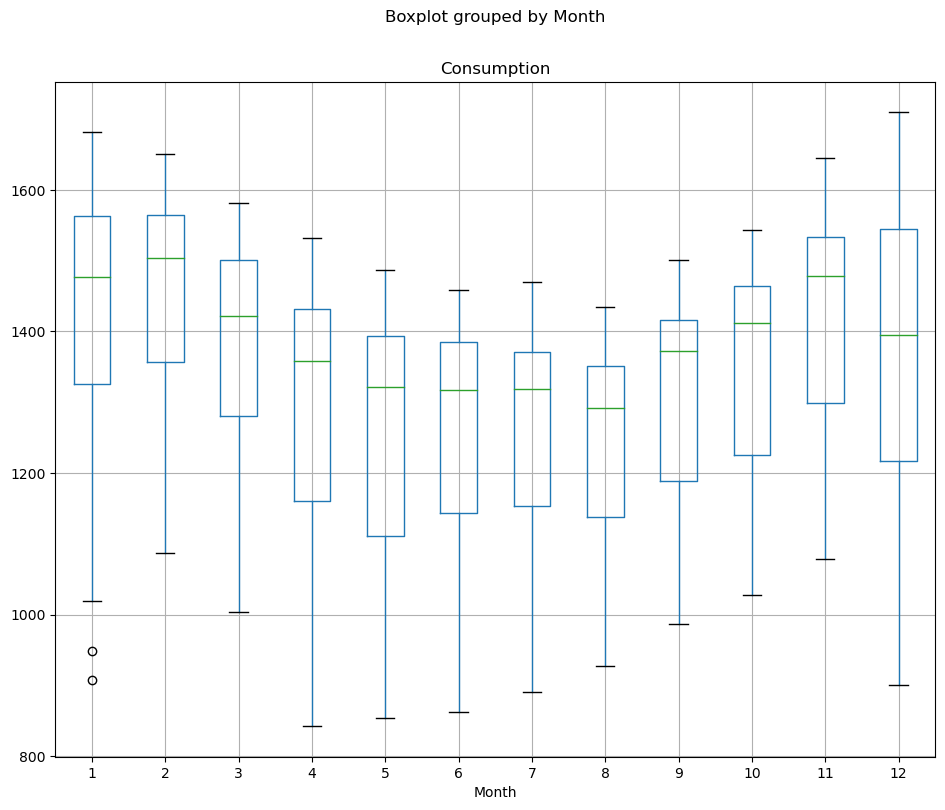

In [294]:
opsd_daily.boxplot(column=["Consumption"], by="Month", figsize=(11, 9))

<Axes: title={'center': 'Solar'}, xlabel='Month'>

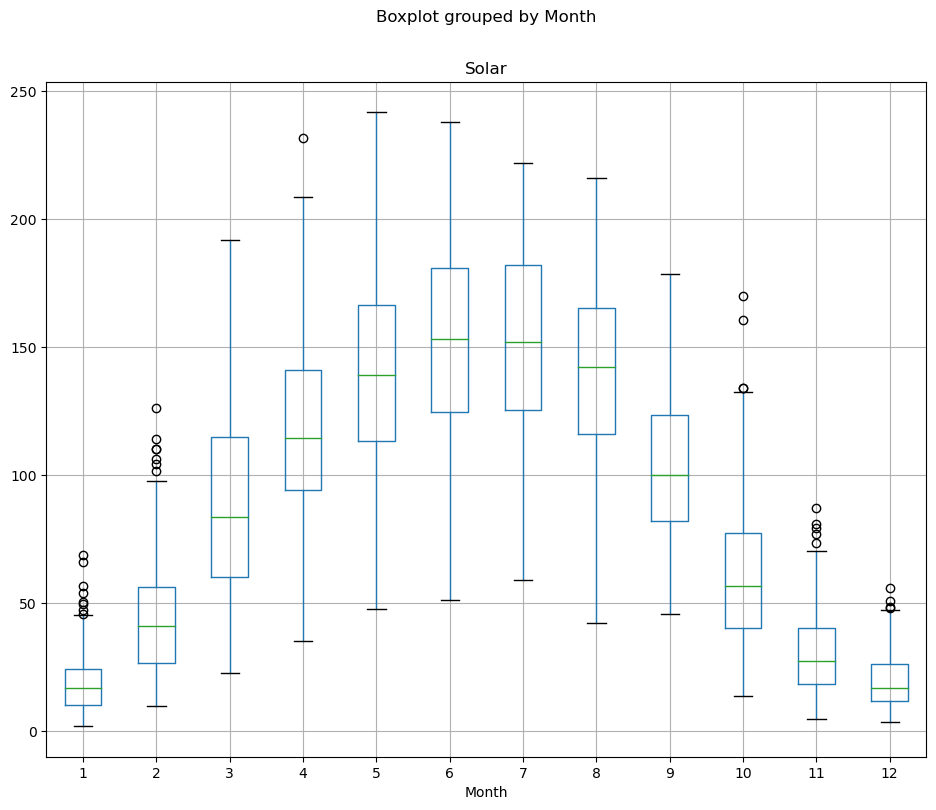

In [295]:
opsd_daily.boxplot(column=["Solar"], by="Month", figsize=(11, 9))

<Axes: title={'center': 'Wind'}, xlabel='Month'>

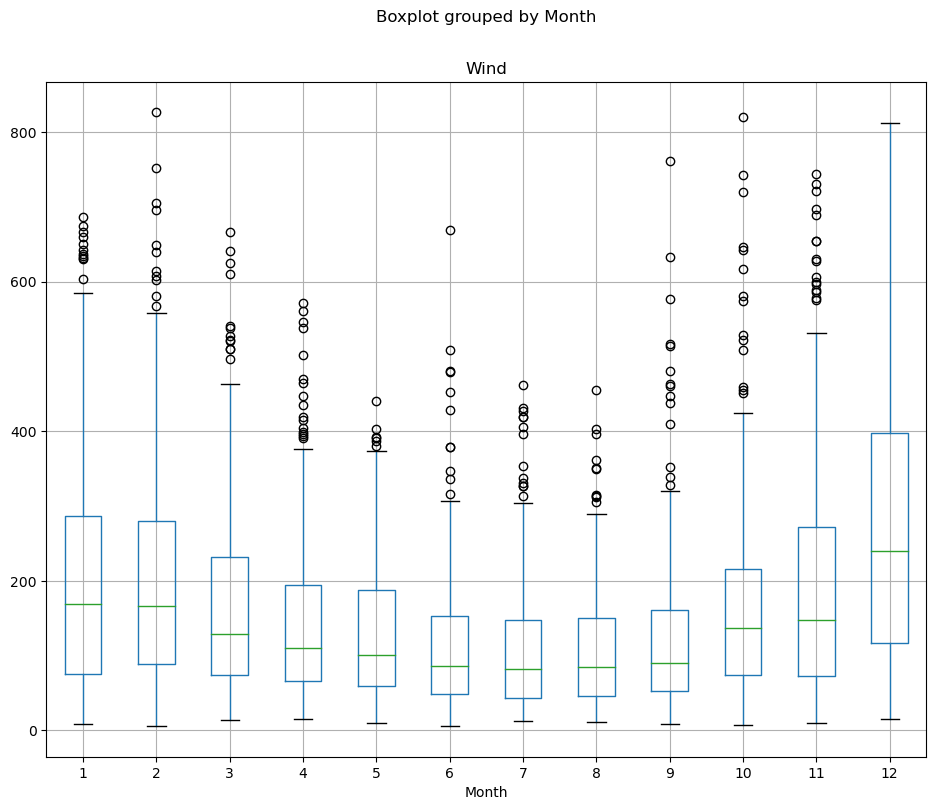

In [296]:
opsd_daily.boxplot(column=["Wind"], by="Month", figsize=(11, 9))

<Axes: title={'center': 'Consumption'}, xlabel='Weekday'>

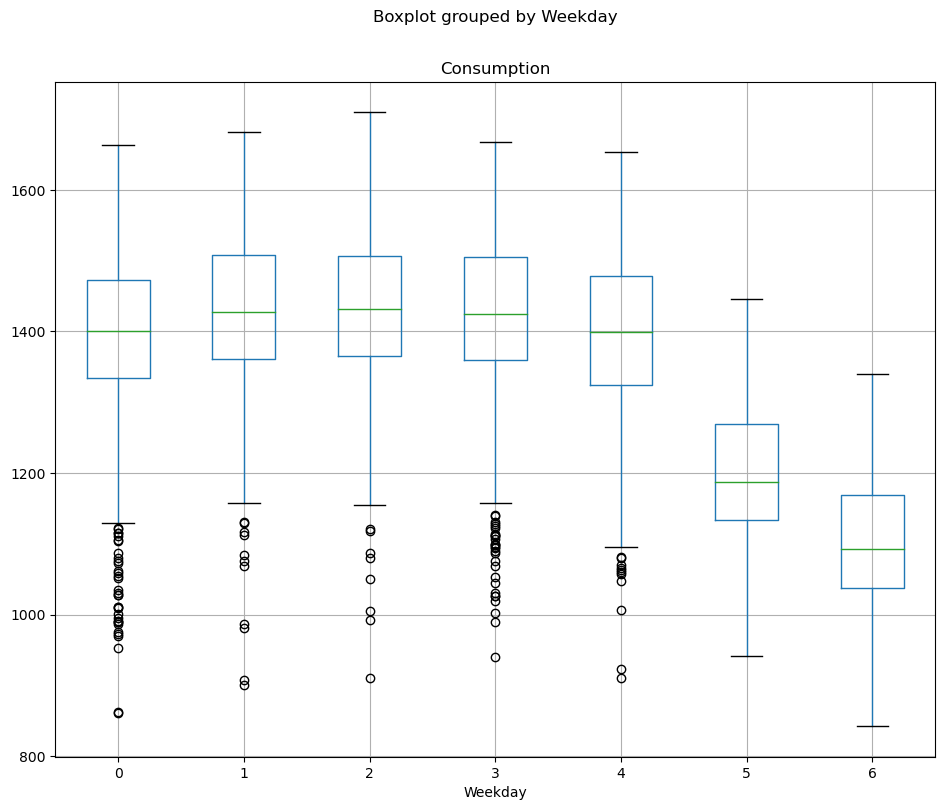

In [299]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday', figsize=(11,9))

Downsampling

In [300]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


Baris pertama di atas, berlabel 2006-01-01, berisi rata-rata dari semua data yang ada dalam time bin 2006-01-01 hingga 2006-01-07. Baris kedua, berlabel 2006-01-08, berisi data rata-rata untuk time bin 2006-01-08 hingga 2006-01-14, dan seterusnya.

In [301]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


<Axes: xlabel='Date'>

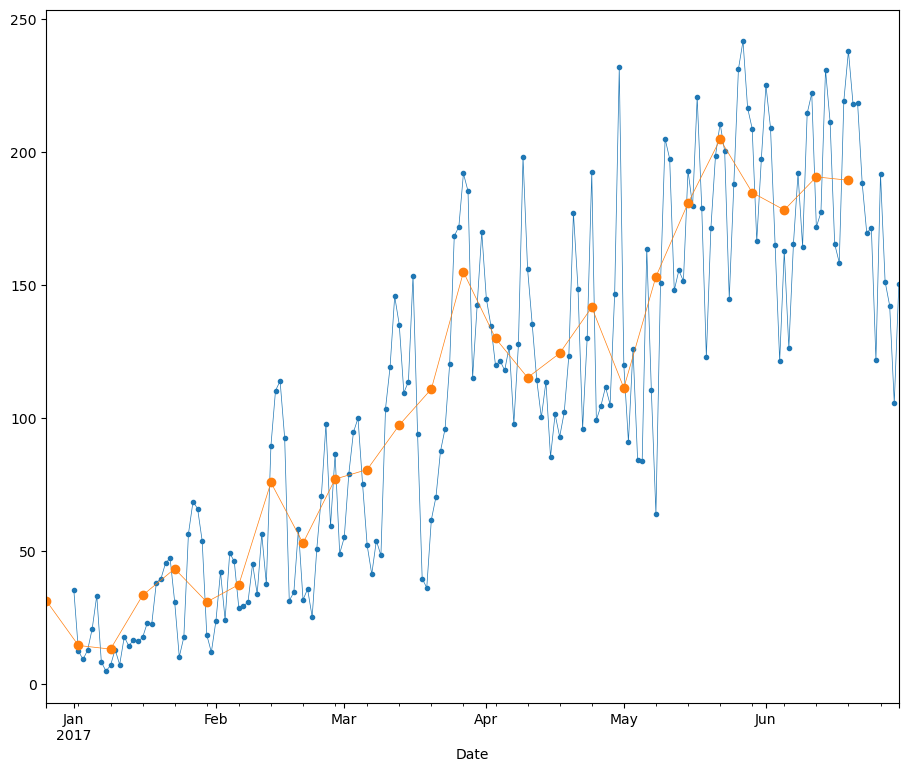

In [320]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(linewidth=0.5,marker=".", linestyle='-',  figsize=(11, 9))
start, end = '2017-01', '2017-06'

opsd_weekly_mean.loc[start:end, 'Solar'].plot(linewidth=0.5,marker="o", linestyle='-',  figsize=(11, 9))

Kita dapat melihat bahwa deret waktu rata-rata mingguan lebih halus daripada deret waktu harian karena variabilitas frekuensi yang lebih tinggi telah dirata-ratakan dalam resampling.